## Monte Carlo Simulation of Disease Transmission


##### Sophia Liu 
##### 08 March 2019

### Table of Contents

1. [The Approach](#The_Approach)


2. [Results and Discussion](#Results-and-Discussion)

    1. [Implimentation of Default Parameters](#Results-and-Discussion)
    
    2. [Variation of Parameters](#Variation-of-Parameters)    
    
        1. [Initial Fraction of Immunity](#Initial-Fraction-of-Immunity)         
         
        2. [Probability of Recovery](#Probability-of-Recovery)         
         
        3. [Infection Rate](#Infection-Rate)
                
    3. [General Rules](#General-Rules)    
    
3. [The SIS Model](#The-SIS-Model)

4. [The SCIR Model](#The-SCIR-Model)

5. [Solving Numerically](#Solving-Numerically)

6. [Conclusions](#Conclusions)

<a id='The_Approach'></a>
### The Approach
<br>

<div style="text-align: justify"> 
The SIR (Susceptible, Infected, Removed) Model was first described by Kermack & McKermack.${^{[1]}}$ The model was used to describe the direct transmission of a disease through a closed population of equally susceptible individuals. The model assumed a closed population, with each indiviual defined by one of three states representing their condition: susceptible (S), infected (I) and removed (R). Initially, the whole population was assumed to be susceptible except for a defined fraction of the population immune to the disease (classed as "Removed"). An infected individual was introduced to the population randomly and the disease propagated through the population by direct transmission. ${^{[1, 2]}}$

The defined program, disease_model, implimented Monte Carlo simulation techniques to model the spread of an infectious disease through a fixed population of students expressed by the following coupled-system of ODEs.  </div>

> $${\frac{dS}{dt} = -k_2SI }\label{Eq 1}$$ 

> $${\frac{dI}{dt} = k_2SI -k_1I}$$

> $${\frac{dR}{dt} = k_1I}$$

<div style="text-align: justify"> 
The infection propagated with a rate constant ${k_2}$, defined as infection rate, and rate of recovery modelled with rate constant ${k_1}$, denoted as the probability of recovery. A default state was defined with a fixed population of ${N = 1000}$, ${k_1 = 0.2 / day}$, ${k_2 = 1 /day} $ with initial conditions ${I(0) = 1}$, ${R(0) = 10}$, representing 1 % of the total population. 

The strategy employed random number generation to simulate the random probability of recovery and random transmission of the disease throughout the population. The program defined the default state as default arguments to the function. Variations to the parameters could be modelled through declaring the appropiate argument in the call to the function. 

The dynamics of the epidemic were assumed to be signficantly faster that the dynamics of birth and death (vital dynamics), hence the assumption of a closed populaton held in this case. </div>

In [1]:
def disease_model(N = 1000, P_immune = 0.01, P_recover = 0.2, days = 40, infection_rate = 1, repeats = 40):
    """
    Monte-Carlo SIR Model for propagation of a disease. 
    
    N: [int] population size (fixed)
    P_immune: [float] fraction of population already immune to disease
    P_recover: [float] rate of recovery students/day
    days: [int] length of 'epidemic' in days
    infection_rate: [int] rate of transmission of the disease students/day
    repeats: [int] number of runs to average over. 
    
    Output array number is average population infected, immune and suspectible after each day. 
    
    """

    import numpy as np
    import random
    
    np.random.seed(200)
    
    reps = np.random.randint(0, 10000, size = repeats)  # defining random seeds for repeats
    
    data = {}
    num_infected = []
    num_immune = []
    num_susept = []

    for r in reps: # loop over repeats
        
        np.random.seed(r)
        
        students = np.random.randint(1, 2, size = N) # array of students
        random_students = random.sample([x for x in range(N)], int(P_immune * N) + 1) # exact fraction of immune students 
        students[random_students[-1]] = 2 # define randomly infected student
    
        for i in random_students[:-1]:
            students[i] = 0 # defining randomly immune students
   
            #initialise count
            num_infected = [int(np.sum(students == 2)) for x in range(3)]
            num_immune = [int(np.sum(students == 0)) for x in range(3)]
            num_susept = [int(np.sum(students == 1)) for x in range(3)]
    
        for d in range(int(days)): # loop over days
            if d >= 0:
                find = np.where(students == 2)[0] # identify ill students
                for s in students:
                    recovery = np.random.rand() # random chance of recovery
                    
                    if s == 2 and recovery <= P_recover: 
                        now_recovered = find[np.random.randint(0, len(find))] #randomly select student to try to recover
                        new_infected = np.random.randint(0,N, size = infection_rate) #randomly select student/s to infect
                        
                        for i in range(0, infection_rate):
                            if students[int(new_infected[i])] == 1: 
                                students[int(new_infected[i])] = 2 #new random suseptible student is infected
                                if students[now_recovered] == 2:
                                    students[now_recovered] = 0 #random student infected is recovered
                            else:
                                students[now_recovered] = 0 #only suspectible students are infected
                   
                    elif s == 2 and recovery > P_recover: #Recovery probability was not met, only infection may occur.
                        new_infected = np.random.randint(0,N, size = infection_rate)
                        for i in range(0, infection_rate):
                            if students[int(new_infected[i])] == 1:
                                students[int(new_infected[i])] = 2 #new random suseptible student infected       
            
        # count number of students in each state after each day 
            num_infected.append(int(np.sum(students == 2)))
            num_immune.append(int(np.sum(students == 0)))
            num_susept.append(int(np.sum(students == 1)))
            
        # store data
        data[r] = np.array((num_infected, num_immune, num_susept))
    
    # extract data from all repeats
    extract_data = np.array(np.array(list(data.values())))
    
    # take average over repeats
    av_susept = extract_data[:, 2].mean(axis = 0)
    av_infected = extract_data[:, 0].mean(axis = 0)
    av_immune = extract_data[:, 1].mean(axis = 0)
    
    no_infected = av_immune - av_immune[0]
    
    # define output array of data
    averages = np.array((av_infected, no_infected, av_susept))
    
    return averages

### Results and Discussion

#### Implimentation of Default Parameters
<br>
<div style="text-align: justify"> 
The default state defined the epidemic about which parameters would be perturbed. Pertubations were designed to gain a deeper understanding of the effect of different parameters on the length and magnitude of an epidemic. The effects of the initial fraction of immunity, probability of recovery and infection rate were investigated on the size of the epidemic. The size of the epidemic was given by the total number of 'Removed' students after 40 days. </div>

In [2]:
#run of default values
model_1 = disease_model()

#Visualisation of Results
import matplotlib.pyplot as plt

plt.subplot(111)
plt.plot(model_1[0, :41], label = "Infected")
plt.plot(model_1[1, :41], label = "Removed")
plt.plot(model_1[2, :41], label = "Suseptible")
plt.title("SIR Simulation of Default Parameters")
plt.ylabel('Number of students')
plt.xlabel('Day')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<div style="text-align: justify"> 
Implimentation of the disease_model, demonstrated a Gaussian-like distribution of infected students over 40 days with a peak at 13 days. The number of suspectible students decayed sigmoidally to 0 while the number of removed students increased similarly to a plateau with $R \rightarrow 1000$. Hence, this would imply that a significant proportion of students, exluding those already immune, contracted the disease and recovered within the 40 days. This default state defined an epidemic. As expected, the rate of increase in infected individuals was symmetric to the rate of decrease in suspectible students. This slope was also steeper than the increase in recovered students since, $k_2 > k_1$.  </div>

#### Variation of Parameters

##### Initial Probability of Immunity
<br>
<div style="text-align: justify"> 
The initial probability of immunity was an initial condition ${R(0)}$ associated with the epidemic. The default state considered 1 % of the initial population to be immune from the disease. Since the rate equations were independent of the initial conditions, it was hypothesised that small variations in the inital probability of immunity would lead to no signficiant changes to the outcome of the epidemic with the exception of random variability. Simulations using increased and decreased initial probabilities of immunity were ran for analysis. </div>

<table style = "width:30%">
    <tr>
        <th style="text-align: center"> Probability of immunity</th>
        <th style="text-align: center"> Initial % of population immune </th>
    </tr>
    <tr>
        <th style="text-align: center">0.01</th>
        <th style="text-align: center">0.994</th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.001 </th>
        <th style="text-align: center"> 0.100 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.1 </th>
        <th style="text-align: center"> 9.48 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.05 </th>
        <th style="text-align: center"> 4.89 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.2 </th>
        <th style="text-align: center"> 18.1 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.25 </th>
        <th style="text-align: center"> 22.1 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.3 </th>
        <th style="text-align: center"> 25.8 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.35 </th>
        <th style="text-align: center"> 29.5 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.4 </th>
        <th style="text-align: center"> 32.9 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.45 </th>
        <th style="text-align: center"> 36.2 </th>
    </tr>
    <tr>
        <th style="text-align: center"> 0.5 </th>
        <th style="text-align: center"> 39.3 </th>
    </tr>
</table> 

<div style="text-align: justify"> 
Changing the parameters highlighted a limitation within the disease_method program. For a stated fraction of immune students, the corresponding code appeared to use a smaller fraction of immune students within the implementation <i>(Table)</i>. This was attributed to repeated random numbers generated using the numpy random integer function. Hence, the code was modified to account for repeated indicies and thus make the probability correspond to absolute proportion of immune students. </div>

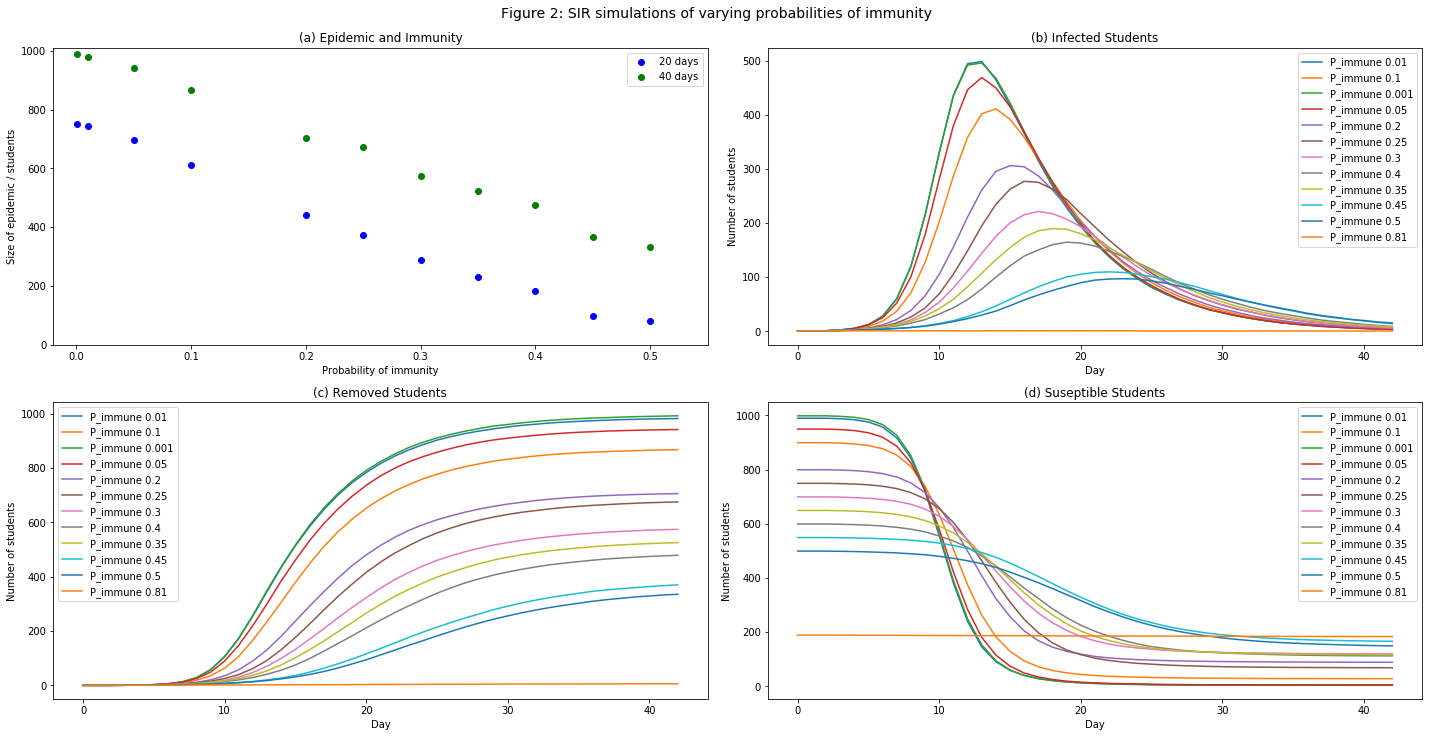

In [3]:
# Investigating variation in P_immune

simulations = {}
P_immunes = [0.01, 0.1, 0.001,0.05, 0.2, 0.25, 0.3, 0.4, 0.35, 0.45, 0.5, 0.81] # define parameters to vary
P_epidemic = []
P_half = []

# run simulation for every parameter
for p in P_immunes:
    simulations['P_immune %s' %(p)] = disease_model(P_immune = p)
    P_epidemic.append(simulations['P_immune %s' %(p)][1][41] )
    P_half.append(simulations['P_immune %s' %(p)][1][19] )

# plotting figures 
fig = plt.figure(figsize = (20, 20))
epi = fig.add_subplot(421)

epi.set_ylim(0, 1010)
epi.set_ylabel('Size of epidemic / students', size = 10)
epi.set_xlabel('Probability of immunity', size = 10)
epi.set_xlim(-0.02, 0.55)

epi.scatter(P_immunes, P_half, color = 'blue', label = '20 days')
epi.scatter(P_immunes, P_epidemic, color = 'green', label = '40 days')

epi.legend()
epi.set_title('(a) Epidemic and Immunity', size = 12)
   
titles = ["(b) Infected Students", "(c) Removed Students", "(d) Suseptible Students"]
prob_immune = list(simulations.keys()) 

for i in range(3): 
    fig.add_subplot(421 + (i + 1))
    for n in range(len(prob_immune)):
        plt.plot(simulations[prob_immune[n]][i], label = prob_immune[n])
    plt.title(titles[i], size = 12)
    plt.xlabel('Day', size = 10)
    plt.ylabel('Number of students', size = 10)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("Figure 2: SIR simulations of varying probabilities of immunity", size = 14)
plt.show() 

<div style="text-align: justify">  
    The size of the epidemic correlated with the fraction of immunity.<i> (Figure 2a) </i> Small variations in fraction of immunity did not signficiantly alter the outcome of the epidemic, with the size of the epidemic ${\rightarrow 1000}$. However, at lower fractions of immunity, the number of infected students "exploded" at around day 13. By day 20, over 75 % of the population had contracted the diease. By contrast, for ${P_{immune} > 0.2}$ the growth rate was slower and the peak in infected students was delayed to around day 16. A stepwise discontinuity was observed between ${ 0.1 \space < \space P_{immune} \space < 0.2}$. In this interval, size of the epidemic decreased to around 800. This reduction in the magnitude of the epidemic was  supported by the magnitude of the peak in infected students <i>(Figure 2b)</i>. An increase in fractional immunity resulted in a decrease in magnitude of the peak number of infected students and  a slower rate of propagation of the disease, governed by ${k_2}$. A  In these cases, as the disease propagated through the closed population, the number of suseptible was students reduced. Hence, for a given random student, the likelihood of the student being suseptible to the disease would reduce each day, slowing the popagation of the disease. This was intuitive and demonstrated in the data. Having said that, the overall length of the epidemic remained unchanged, with the number of students in each SIR state remaining constant by 40 days. </div>
<br>
<div style="text-align: justify">  
Similar justification was given for the behaviour of the epidemic at higher probabilities of immunity. In this case, above 40 % immunity, the magnitude of the epidemic was signficantly smaller, as the disease did not propagate through the entire population. For ${P_{immune} = 0.5}$, after 20 days, only a slight increase in size of the epidemic was observed, and only a gradual increase in the number of infected students was simulated with no distinct peak. This phenomenon is known as herd immunity. With an increase in proportion of removed students, the smaller the probabilty of a suspectible student coming into contact with an infected individual. Hence, the spread of a disease through a population was indirectly prevented. 
It was hypothesised that above 40 % immunity there existed a critical value such that the disease no longer propagated through the population. This critical value was suggested to be the <i>effective reproductive number</i>, ${R_e}$.${^{[3]}}$ </div>

> $${R_e = \frac{S(0)}{N}\frac{k_2}{k_1} } $$

<div style="text-align: justify"> 
It has been postulated that for an epidemic to occur, ${R_e > 1}$ and for ${R_e \leq 1}$ then $I(t)$ would monotonically decay to zero and no epidemic would be observed. With ${P_{immune} = 0.4}$, ${S(0) = 600}$. This resulted in ${R_e = 2 > 1}$. This implied that an epidemic was observed, with ${I(t) \rightarrow 1000}$ as ${t \rightarrow \infty}$. An epidemic was arguably observed after 40 days, however its magnitude did not extend to $R \rightarrow 1000$. The <i> effective reproductive number </i> predicted an epidemic for all ${P_{immune} \leq 0.5}$. At ${P_{immune} = 0.5 }$, the disease did propagate and a small epidemic recorded. ${S(0)_c = 200}$ and ${P_{immune, c} = 0.8}$ were calculated as the critical parameters for the onset of an epidemic, such that ${R_e = 1}$. Indeed at ${P_{immune} = 0.8}$, The number of suseptible and removed students remained constant, no epidemic was observed. </div>
<br>
<div style="text-align: justify">
    The <i> effective reproductive number </i>, was derived from the governing ODEs and not from empirical data. The SIR model generated in this work simulates results in agreement with this equation. </div>
<br>
<div style="text-align: justify"> 
The rate of recovery, ${k_1}$ was observed as greater for populations with a lower fraction of immunity. The rate of increase in removed students per day <i> (Figure 2c) </i> was faster when the population was saturated with infected individuals. Since the recovery was modelled as a probability, it was intuitive to observe faster recovery when a greater fraction of the population was infected at a given time.  </div>

##### Probability of Recovery
<br>
<div style="text-align: justify"> 
The  probability of recovery was modelled as the rate of recovery, ${k_1}$. In the governing ODEs of the system, the rate of change in infected and removed individuals depended on ${k_1}$. The default case defined ${k_1 = 0.2 /day}$. Hence, it was expected that an increase in ${k_1}$ from the default state would result in a decrease in length of epidemic. This was consistent with the equation for the <i> effective reproductive number </i>, where ${R_e \propto \frac{1}{k_1}}$. The occurrence of an epidemic was less likely at a higher rate of recovery. </div>

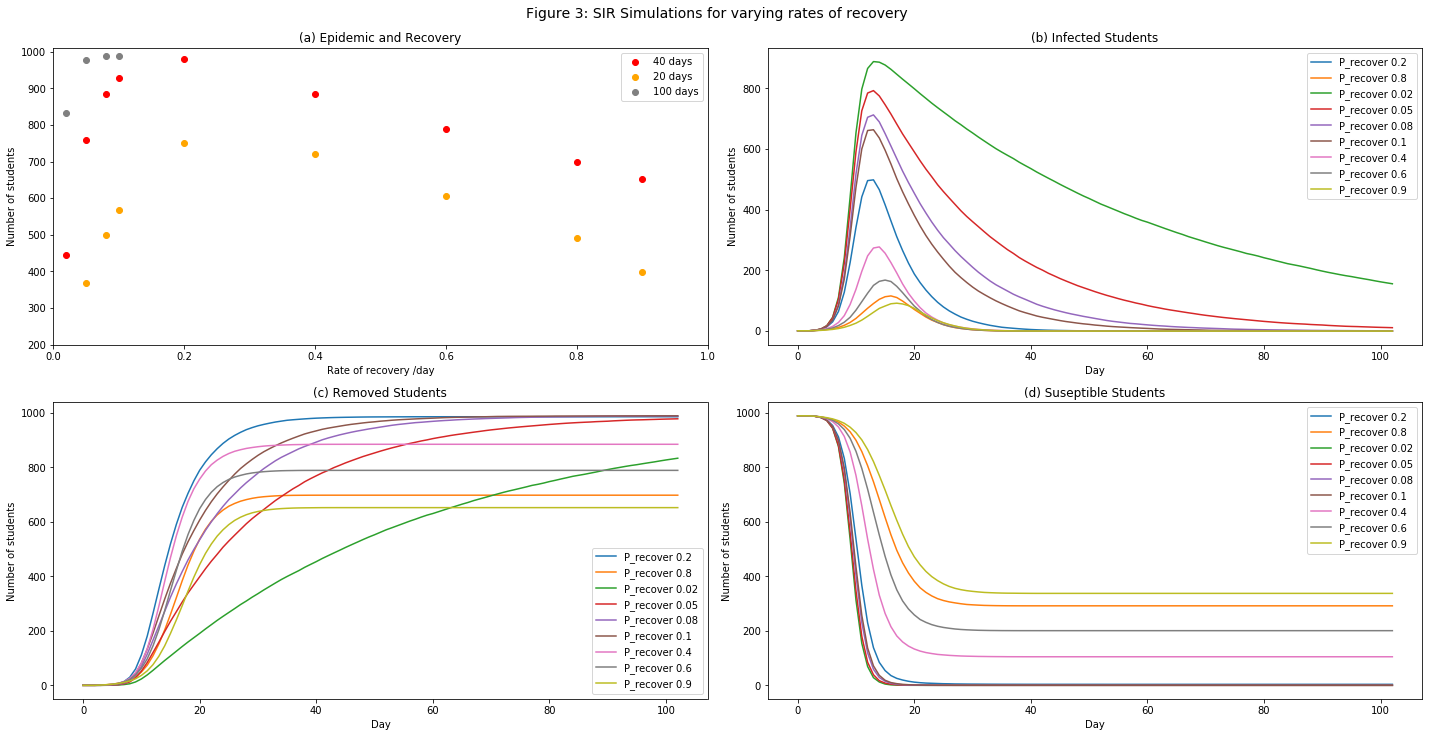

In [4]:
#Investigating variation in probability of recovery
recoveries = [0.2, 0.8, 0.02, 0.05, 0.08, 0.1, 0.4, 0.6, 0.9] # define variables to run
recover_sim = {}
R_epidemic =[]
R_half = []
R_long = []

# run variables in simulation and extract data

for r in recoveries:
    recover_sim['P_recover %s' %(r)] = disease_model(P_recover = r, days = 100)
    R_epidemic.append(recover_sim['P_recover %s' %(r)][1][39] )
    R_half.append(recover_sim['P_recover %s' %(r)][1][19] )
    R_long.append(recover_sim['P_recover %s' %(r)][1][-1] )

fig = plt.figure(figsize = (20, 20))
R1 = fig.add_subplot(421)

R1.set_xlim(0, 1)
R1.set_ylim(200,1010)

R1.set_ylabel('Number of students', size = 10)
R1.set_xlabel('Rate of recovery /day', size = 10)

R1.scatter(recoveries, R_epidemic, color = 'red', label = '40 days')
R1.scatter(recoveries, R_half, color = 'orange', label = '20 days')
R_long_index = [recoveries.index(x) for x in recoveries if x < 0.2]
R1.scatter([x for x in recoveries if x < 0.2], [R_long[i] for i in R_long_index], color = 'grey', label = '100 days')
R1.set_title('(a) Epidemic and Recovery', size = 12)
R1.legend()


prob_recover = list(recover_sim.keys()) 
    
for i in range(3):    
    plt.subplot(421 + (i + 1))
    for n in range(len(prob_recover)):
        plt.plot(recover_sim[prob_recover[n]][i], label = prob_recover[n])
    plt.title(titles[i], size = 12)
    plt.xlabel('Day', size = 10)
    plt.ylabel('Number of students', size = 10)    
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("Figure 3: SIR Simulations for varying rates of recovery", size = 14)
plt.show()

<div style="text-align: justify">
A non-linear relationship was observed between rate of recovery and the propagation of the epidemic. <i> (Figure 3a) </i> Initially, for ${k_1 > k_{1 (default)} = 0.2}$, the size of the epidemic appeared to increase linearly with the rate of recovery, to a peak at the default state. However, it was observed that after the 40 days, a larger proportion of the population was still infected. <i> (Figure 3b) </i> In other words the epidemic was ongoing. At longer timepoints (100 days), it was observed that the epidemic was of the same magnitude as the default state, with the size ${\rightarrow 1000}$. In addition, as the rate of propagation of the disease was faster, there was greater maximum number of infected students at any given time. Especially in the case of ${k_1 = 0.02 /day}$, almost the whole population was infected in 10 days. By contract, only approximately half the population was infected by the default state in the same timeframe. However, as expected intuivitely, with a lower rate of recovery, the duration of the epidemic was dramatically increased. After 100 days, for ${k_1 = 0.02}$ the epidemic was still ongoing whereas the default state plateaued after approximately 30 days. <i> (Figure 3c, 3d) </i> The increase in this length of epidemic was also non-linear. </div>
<br>
<div style="text-align: justify">
For ${k_1 > k_{1(default)}}$, the magnitude of the epidemic decreased almost linearly with increasing rate of recovery. <i> (Figure 3a) </i>  This was expected with consideration to ${R_e}$. As ${R_e \propto \frac{1}{k_1}}$, it was expected that the ocurrance of an epidemic would be less likely at higher rates of recovery. Indeed, at ${k_1 = 0.9 /day}$ the maximum number of students infected on any given day was approximately 100, significantly smaller than the default maximum ${\approx 500}$. However, for ${k_1 = 0.9 /day}$ the total magnitude of the epidemic still implied that over half the population was infected by the disease after 40 days ${\approx 600}$. This would still define an epidemic. Hence, the rate of recovery did not significantly impact the onset of an epidemic but had an effect on the duration of an epidemic. </div>

##### Infection Rate
<br>
<div style="text-align: justify"> 
The  infection rate, ${k_2}$ was modelled as an integer number of students infected per day. In the governing ODEs of the system, the rate of change in infected and suseptible individuals depended on this rate. The default case defined ${k_1 = 1 /day}$. It was expected that an increase in ${k_1}$, from the default state, would result in an increase in the rate of propagation of the disease throughout the population. This was consistent with the equation for the <i> effective reproductive number </i>, where ${R_e \propto {k_2}}$. The occurrence of an epidemic was more likely at a higher rate of infection. </div>

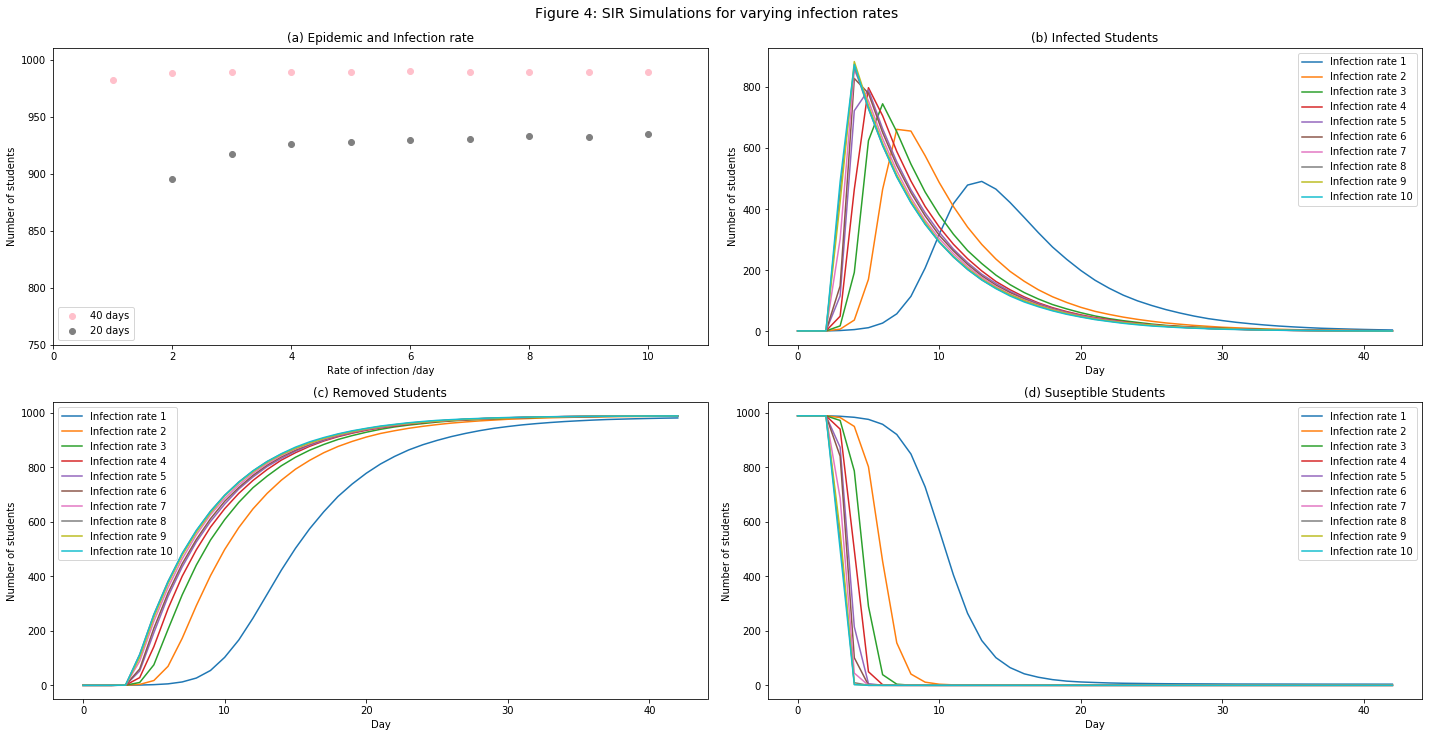

In [5]:
#Investigating variation in infection rate

infections = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # infection rates to run
infections_sim = {}
I_epidemic = []
I_half = []

# run infection rates and extract data
for i in infections:
    infections_sim['Infection rate %s' %(i)] = disease_model(infection_rate = i)
    I_epidemic.append(infections_sim['Infection rate %s' %(i)][1][-1] )
    I_half.append(infections_sim['Infection rate %s' %(i)][1][19] )

# plot figures
fig = plt.figure(figsize = (20, 20))
I1 = fig.add_subplot(421)

I1.set_xlim(0, 11)
I1.set_ylim(750, 1010)

I1.set_ylabel('Number of students', size = 10)
I1.set_xlabel('Rate of infection /day', size = 10)

I1.scatter(infections, I_epidemic, color = 'pink', label = '40 days')
I1.scatter(infections, I_half, color = 'grey', label = '20 days')

I1.set_title('(a) Epidemic and Infection rate', size = 12)
plt.legend()

infection_labels = list(infections_sim.keys()) 
    
for i in range(3):    
    plt.subplot(421 + (i + 1))
    for n in range(len(infection_labels)):
        plt.plot(infections_sim[infection_labels[n]][i], label = infection_labels[n])
    plt.title(titles[i], size = 12)
    plt.xlabel('Day', size = 10)
    plt.ylabel('Number of students', size = 10)    
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("Figure 4: SIR Simulations for varying infection rates", size = 14)
plt.show()

<div style="text-align: justify">
At all infection rates, an epidemic occured, with the magnitude of epidemic reaching around 1000 after 40 days. <i> (Figure 4a) </i> The effect of changing the parameter on the epidemic could be observed at 20 days. In the limit of high infection rates, a plateau was observed at 20 days around 940 students. This implied that the disease had fully propagated through the population and that all suspectible students were either removed or still infected. The rate in change the size of the epidemic was now independent of ${k_2}$ was depended only on the rate of recovery, ${k_1}$.</div>
<br>
<div style="text-align: justify">
Increasing the infection rate, ${k_2}$ resulted in an increase in rate of disease propagation, as expected. At the highest simulated rate, ${k_2 = 10 / day}$ the maximum number of infected students was ${ \approx 750}$ around day 6. <i> (Figure 3b) </i>. This maxima occured 4 days prior to the maxima observed using the default parameters. The maxima was also greater in magnitude with a maximum of ${\approx 500}$. The governing ODEs suggested that higher rates of infection would lead to a faster rate in change of infected students, as supported by these data. </div>

#### General Rules
<br>
<div style="text-align: justify">
With consideration to the variation of default parameters within the disease simulations, the following general rules were formulated. </div>


1. ***The epidemic was non-terminal***. 
<div style="text-align: justify">
The number of infected students decayed with time in all simulations. The rate of this decay was independent of the fraction of immunised students. However the rate was inversely proportional to the probability of recovery. At lower probability of recovery, the maxima number of infected students was higher and the rate of their recovery was slower. This result was intuitive.</div>
<br>

2. ***The epidemic was limited***.
<div style="text-align: justify">
It was shown that as ${t \rightarrow \infty}$, the number of suspectible, infected and recovered reached a plateau. Hence, there existed limits such that ${S(t) \rightarrow S(\infty)}$, ${R(t) \rightarrow R(\infty)}$. </div>
<br>  

3. ***There existed a critical value for the onset of an epidemic***.
<div style="text-align: justify">
The <i> effective reproductive number </i>, ${R_e}$ was shown to be applicable for the SIR model applied to this system. The onset of an epidemic could be prevented by herd immunity if the fraction of immunity of a propulation was increased above a critical value, ${P_{immune, c}}$. 

### The SIS Model
<br>
<div style="text-align: justify">
The existing SIR model was adjusted to allow for the reinfection of individuals within a population. This modification resulted in the implementation of an SIS model, whereby infected individuals return to a suspectible state after infection. In other words, infection of the disease resulted in no increase in immunity. </div>

The key change in the program was implemented by a change in assigned state to an individual upon recovery. 

```
students[now_recovered] = 1 #random student infected is recovered, now suseptible
```

This line replaced the equivalent line in disease_model which assigned the removed state "0" to an individual. 

```
students[now_recovered] = 0 #random student infected is recovered
```

In [6]:
def reinfect_model(N = 1000, P_immune = 0.01, P_recover = 0.2, days = 40, infection_rate = 1, repeats = 40):
    
    """
    Monte-Carlo SIR Model for propagation of a disease. Variation of disease_model function. Allows reinfection.
    Output array: number in population infected, immune and suspectible after each day. 
    
    """
    import numpy as np
    import random
    
    np.random.seed(200)
    
    reps = np.random.randint(0, 10000, size = repeats)  # defining random seeds for repeats
    
    data = {}
    num_infected = []
    num_immune = []
    num_susept = []

    for r in reps: # loop over repeats
        
        np.random.seed(r)
        
        students = np.random.randint(1, 2, size = N) # array of students
        immune = random.sample([x for x in range(N)], int(P_immune * N)) # random selection of immune students
        students[np.random.randint(0,N)] = 2 # defining randomly infected student
    
        for i in immune:
            students[i] = 0 # defining randomly immune students
   
            #initialise count
            num_infected = [int(np.sum(students == 2)) for x in range(3)]
            num_immune = [int(np.sum(students == 0)) for x in range(3)]
            num_susept = [int(np.sum(students == 1)) for x in range(3)]
    
        for d in range(int(days)): # loop over days
            if d >= 0:
                find = np.where(students == 2)[0] # identify ill students
                for s in students:
                    recovery = np.random.rand() # random chance of recovery
                    
                    if s == 2 and recovery <= P_recover: 
                        now_recovered = find[np.random.randint(0, len(find))] #randomly select student to try to recover
                        new_infected = np.random.randint(0,N, size = infection_rate) #randomly select student/s to infect
                        
                        for i in range(0, infection_rate):
                            if students[int(new_infected[i])] == 1: 
                                students[int(new_infected[i])] = 2 #new random suseptible student is infected
                                if students[now_recovered] == 2:
                                    students[now_recovered] = 1 # random student infected is recovered, now suseptible
                            else:
                                students[now_recovered] = 1 #only suspectible students are infected
                   
                    elif s == 2 and recovery > P_recover: # Recovery probability was not met, only infection may occur.
                        new_infected = np.random.randint(0,N, size = infection_rate)
                        for i in range(0, infection_rate):
                            if students[int(new_infected[i])] == 1:
                                students[int(new_infected[i])] = 2 # new random suseptible student infected       
            
        # count number of students in each state after each day 
            num_infected.append(int(np.sum(students == 2)))
            num_immune.append(int(np.sum(students == 0)))
            num_susept.append(int(np.sum(students == 1)))
            
        # store data
        data[r] = np.array((num_infected, num_immune, num_susept))
    
    # extract data from all repeats
    extract_data = np.array(np.array(list(data.values())))
    
    # take average over repeats
    av_susept = extract_data[:, 2].mean(axis = 0)
    av_infected = extract_data[:, 0].mean(axis = 0)
    av_immune = extract_data[:, 1].mean(axis = 0)
    
    no_infected = av_immune - av_immune[0]
    
    # define output array of data
    averages = np.array((av_infected, no_infected, av_susept))
    
    return averages

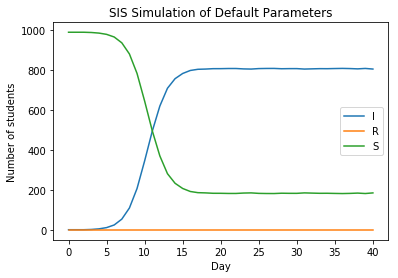

In [7]:
reinfect_1 = reinfect_model() # run simulation

# plot results 
import matplotlib.pyplot as plt
plt.plot(reinfect_1[0, :41], label = 'I')
plt.plot(reinfect_1[1, :41], label = 'R')
plt.plot(reinfect_1[2, :41], label = 'S')
plt.title("SIS Simulation of Default Parameters")
plt.ylabel("Number of students")
plt.xlabel("Day")
plt.legend()

plt.show()

<div style="text-align: justify">
With no immunity following infection, the proportion of removed students would not increase with implementation of the model. Indeed, the number of removed students remained constant over the duration of the epidemic. Hence, ${\frac{dR}{dt} = 0}$. Additionally, the rate of change of susceptible students now depended on the rate of recovery, ${k_1}$ as well as the rate of infection, ${k_2}$. The system of governing ODEs results yeilded: </div>

> $${\frac{dS}{dt} = -k_2SI + k_1I}$$ 

> $${\frac{dI}{dt} = k_2SI -k_1I}$$

<div style="text-align: justify">
It was clearly deduced that ${\frac{dS}{dt} = -\frac{dI}{dt}}$. Hence, the SIS plot was symmetric about a critical population value. 
Oscilliations observed beyond the critical value were due to the random probability of recovery. In the case of reinfection, the epidemic did not percieve an endpoint without any intervention. Hence the epidemic continued infinitly with multiple individual infection, recovery and reinfection cycles. </div>

### The SCIR Model
<br>
<div style="text-align: justify">
The simulation model was adjusted to consider the propagation of a virulent disease within a population with an incubation period. This modification resulted in the implementation of an SCIR model, and defined a new state of students, carriers (C). Students infected with the disease initially were defined as carriers and acted as vectors to transmit the disease through the population without themselves exhibiting any symptoms. A probability of mutation, ${P_{mutation}}$ was defined. If ${P> P_{mutation}}$ the the student would no longer transmit the disease but become infected. ${^{[3]}}$ </div>

In [8]:
def mutation_model(N = 1000, P_immune = 0.01, P_recover = 0.2, days = 40, carrier_rate = 2, P_mutation = 0.3,
                   repeats = 40):
    
    """
    Monte-Carlo SCIR Model for propagation of a disease. Variation of disease_model function.
    Models propagation of a virulent disease with an incubation period. 
    Output array: number in population infected, removed, suspectible and carrier after each day. 
    
    New args:
    carrier_rate: [int] taken instead of infection_rate, rate of propagation of disease students/day
    P_mutation: [float] probability of mutation of disease to infected state
    
    """
    import numpy as np
    import random
    
    np.random.seed(200)
    
    reps = np.random.randint(0, 10000, size = repeats)  # defining random seeds for repeats
    
    data = {}
    num_carrier = []
    num_immune = []
    num_susept = []
    num_infected = []

    for r in reps: # loop over repeats
        
        np.random.seed(r)
        
        students = np.random.randint(1, 2, size = N) # array of students
        immune = random.sample([x for x in range(N)], int(P_immune * N)) # random selection of immune students
        students[np.random.randint(0,N)] = 2 # defining randomly infected student
    
        for i in immune:
            students[i] = 0 # defining randomly immune students
   
            #initialise count
            num_carrier = [int(np.sum(students == 2)) for x in range(3)]
            num_immune = [int(np.sum(students == 0)) for x in range(3)]
            num_susept = [int(np.sum(students == 1)) for x in range(3)]
            num_infected = [int(np.sum(students == 3)) for x in range(3)]
    
        for d in range(int(days)): # loop over days
            if d >= 0:
                find = np.where(students == 2)[0] # identify carriers
                for s in students:
                    recovery = np.random.rand() # random chance of recovery
                    mutation = np.random.rand() # random chance of mutation
                    if s == 2 and mutation <= P_mutation: 
                        now_recovered = find[np.random.randint(0, len(find))] #randomly select student to mutate
                        new_infected = np.random.randint(0,N, size = carrier_rate) #randomly select student/s to infect
                        
                        for i in range(0, carrier_rate):
                            if students[int(new_infected[i])] == 1: 
                                students[int(new_infected[i])] = 2 #new random suseptible student is a carrier
                                if students[now_recovered] == 2:
                                    students[now_recovered] = 3 # random carrier students is ill
                            else:
                                students[now_recovered] = 3 #only suspectible students are infected
                   
                    elif s == 2 and mutation > P_mutation: # Only spread of disease may occur.
                        new_infected = np.random.randint(0,N, size = carrier_rate)
                        for i in range(0, carrier_rate):
                            if students[int(new_infected[i])] == 1:
                                students[int(new_infected[i])] = 2 # new random suseptible student is a carrier
                    elif s == 3 and recovery <= P_recover:
                        now_recovered = np.where(students == 3)[0][np.random.randint(0, len(np.where(students ==3)[0]))] 
                        #randomly select student to mutate
                        if students[now_recovered] == 3:
                                students[now_recovered] = 0 # ill student now immune
            
        # continue count 
            num_carrier.append(int(np.sum(students == 2)))
            num_immune.append(int(np.sum(students == 0)))
            num_susept.append(int(np.sum(students == 1)))
            num_infected.append(int(np.sum(students == 3)))
            
        # store data
        data[r] = np.array((num_infected, num_immune, num_susept, num_carrier))
    
    # extract data from all repeats
    extract_data = np.array(np.array(list(data.values())))
    
    # take average over repeats
    av_susept = extract_data[:, 2].mean(axis = 0)
    av_infected = extract_data[:, 0].mean(axis = 0)
    av_immune = extract_data[:, 1].mean(axis = 0)
    av_carrier = extract_data[:, 3].mean(axis = 0)
    
    no_infected = av_immune - av_immune[0]
    
    # define output array of data
    averages = np.array((av_infected, no_infected, av_susept, av_carrier))
    
    return averages

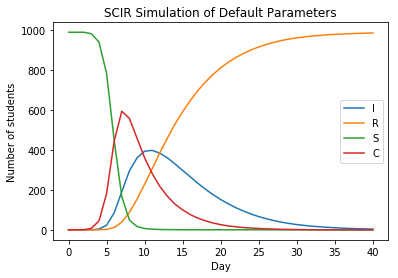

In [9]:
mutation_1 = mutation_model() # run simulation

# visualise results
import matplotlib.pyplot as plt
plt.plot(mutation_1[0, :41], label = 'I')
plt.plot(mutation_1[1, :41], label = 'R')
plt.plot(mutation_1[2, :41], label = 'S')
plt.plot(mutation_1[3, :41], label = 'C')
plt.title("SCIR Simulation of Default Parameters")
plt.ylabel("Number of students")
plt.xlabel("Day")
plt.legend()

plt.show()

<div style="text-align: justify">
The SCIR model in the case where ${P_{mutation} = 0.3}$ and ${carrier \space rate = 2 /day}$, simulated an epidemic featuring two distinct peaks. The number of carriers peaked at 10 days, and at 15 days, the number of infected peaked. This was intuitively expected. A delay was observed in the infection of the population, with students passing through the 'carrier' state prior to infection, hence delaying the onset of infected individuals. Since transmission only occurred in the carrier state, the fastest decay in suseptible students (or fastest rate of transmission) was observed around 10 days, where the number of carriers was at its peak. The suitability of this proposed model could be investigated with comparisons to data. </div>

### Solving Numerically
<br>
<div style="text-align: justify">
The governing ODEs for the SIR model defined a coupled system of first order ODEs. The system could not be solved analytically. The Euler method was employed to numerically integrate the ODEs. </div> 
    
For a given initial value problem (IVP), 

>$${\frac{dy}{dt} = f(x, y) , \space \space y(a) = y_0(t_0) = A}$$

the Euler method gave an approximation to the solution as 
>$${y(a + h) = y_0 + hf(t_0, y_0)}$$

>$${t = [a, a + h]}$$. 

To approximate solutions to the SIR IVP, the Euler method was employed with the following Python script.

In [10]:
#Solving numerically
import numpy as np

#Defining initial parameters
t0 = 0 
S0 = 989
I0 = 1
R0 = 1000 - (S0 + I0)

#Defining reaction parameters
tf = 40
n = 41
dt = 1
k2 = 0.001
k1 = 0.2

#Defining timescale
t = np.linspace(t0, tf, n)

#Inital conditions
S = np.zeros([n])
I = np.zeros([n])
R = np.zeros([n])
S[0] = S0
I[0] = I0
R[0] = R0

#Euler computation
for i in range(1, n):
    S[i] = S[i-1] - (dt * I[i-1] * S[i-1] * k2)
    I[i] = dt * ((k2 * S[i-1] * I[i-1]) - (k1 * I[i-1])) + I[i-1]
    R[i] = 1000 - (S[i] + I[i])

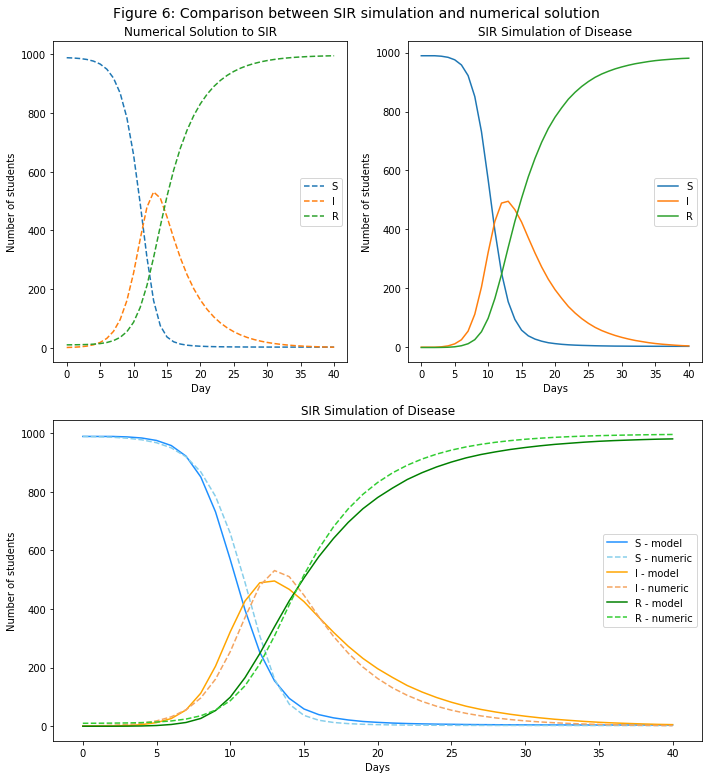

In [11]:
#Visualisation of Results
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 11))

fig1 = fig.add_subplot(222)
fig1.plot(model_1[2, :41], label = "S")
fig1.plot(model_1[0, :41], label = "I")
fig1.plot(model_1[1, :41], label = "R")
fig1.set_title("SIR Simulation of Disease")
fig1.legend()
fig1.set_xlabel('Days')
fig1.set_ylabel('Number of students')

fig2 = fig.add_subplot(221)
fig2.plot(t, S, label = 'S', linestyle = '--')
fig2.plot(t, I, label = 'I', linestyle = '--')
fig2.plot(t, R, label ='R', linestyle = '--')
fig2.set_xlabel('Day')
fig2.set_ylabel('Number of students')
fig2.legend()
fig2.set_title("Numerical Solution to SIR")

fig3 = fig.add_subplot(212)
fig3.plot(model_1[2, :41], label = "S - model", color = 'dodgerblue')
fig3.plot(t, S, label = 'S - numeric', color = "skyblue", linestyle = '--')
fig3.plot(model_1[0, :41], label = "I - model", color = 'orange')
fig3.plot(t, I, label = 'I - numeric', color = 'sandybrown', linestyle = '--')
fig3.plot(model_1[1, :41], label = "R - model", color = 'green')
fig3.plot(t, R, label ='R - numeric', color = 'limegreen', linestyle = '--')
fig3.set_title("SIR Simulation of Disease")
fig3.legend()
fig3.set_xlabel('Days')
fig3.set_ylabel('Number of students')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("Figure 6: Comparison between SIR simulation and numerical solution", size = 14)
plt.show()

<div style="text-align: justify">
The simulated SIR model created in this work was in close agreement with the numerical solution generated by the Euler method. Sigmoidal growth was observed in the number of removed students and sigmoidal decay observed in the number of suseptible students. The numerical solution implied a Gaussian function as a solution to the number of immune students, as expected from the simulation. Deviation between the numerical solution and the simulations was attributed to random variability within the model, the numerical solution was an ideal approximation and not subject to probability. However probability should have been mitigated by the Monte Carlo method. The numeric solution and simulated model resulted in a peak in infected students at ${\approx 13 \space days}$, however the magnitude of the peak in the simulated model was slightly lower than that in the numeric. 
    </div>

### Conclusions
<br>
<div style="text-align: justify">
The SIR model for an infectous disease was simulated using application of Monte Carlo techniques. The variation of parameters including the probability of immunity, ${P_{immune}}$, rate of recovery ${k_1}$ and rate of infection ${k_2}$ were perturbed to understand their effects on the model. Increasing the probability of immunity within the population above a threshold resulted in the observed herd immunity phenonena. The <i> effective reproductive number </i> was verified as an appropiate critical value for the onset of an epidemic of a disease through pertubations to ${P_{immune}}$. Variations in rate of recovery did not alter the onset of an epidemic, only the magnitude. At the highest rates of recovery, the magnitude and length of the epidemic was reduced. Increasing rate of infection ${k_2}$ led to a faster rate in disease propagation but did not effect the onset of an epidemic. The simulation model was additionally adjusted to account for reinfection, representing an SIS model for disease. Additionally, an SCIR model was proposed to simulate more complex disease propagations. The governing equations for the SIR model were solved numerically. The numerical solution was an ideal Gaussian curve for infected students and sigmoidal growth and decay observed for the number of removed and suseptible students, as observed with the SIR simulation. </div>

### References
1. Kermack. W.O., McKendrick. A.G., A contribution to the Mathmatical Theory of Epidemics. 1927.
2. Weiss. H., The SIR Model and the Foundations of Public Health. <i> MATerials MATematics </i>.  Georgia Institute of Technology. Georgia. Vol. 3. 2013.
3. Burge. T., Lubuma. J.M.S., Moremedi. G.M., Morris. N., Kondera-Shava. R., A simple mathematical model for Ebola in Africa. <i> Journal of Biological Dynamics </i> 2017. 11<b>(1)</b>. 42-74. 